In [112]:
pip install scipy statsmodels

Note: you may need to restart the kernel to use updated packages.


In [113]:
# to deactivate warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#Import Libraries

In [114]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Statistical Analysis with SciPy

# Descriptive Statistics

In [118]:
data = np.array([10, 20, 30, 40, 50])

# Mean, Median, Standard Deviation
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}")


Mean: 30.0, Median: 30.0, Standard Deviation: 14.142135623730951


# Hypothesis Testing

# One-Sample t-Test:

In [120]:
t_stat, p_val = stats.ttest_1samp(data, popmean=25)
print(f"t-statistic: {t_stat}, p-value: {p_val}")


t-statistic: 0.7071067811865475, p-value: 0.5185185185185183


# Two-Sample t-Test:

In [122]:
group1 = [5, 15, 25, 35]
group2 = [10, 20, 30, 40]
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"t-statistic: {t_stat}, p-value: {p_val}")


t-statistic: -0.5477225575051661, p-value: 0.6036450565101363


# Chi-Square Test

In [124]:
observed = np.array([50, 30, 20])
expected = np.array([40, 35, 25])
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Chi-square statistic: 4.214285714285714, p-value: 0.12158485594365533


# ANOVA Test

In [126]:
group1 = [5, 10, 15]
group2 = [20, 25, 30]
group3 = [35, 40, 45]
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat}, p-value: {p_val}")


F-statistic: 27.0, p-value: 0.0010000000000000002


# Statistical Analysis with statsmodels
Linear Regression
Using statsmodels.api:

In [128]:
X = sm.add_constant([1, 2, 3, 4, 5])  # Add constant for intercept
y = [2, 4, 5, 4, 5]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Tue, 28 Jan 2025   Prob (F-statistic):              0.124
Time:                        12:32:52   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

# Using Formula API:

In [130]:
data = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]})
model = smf.ols('y ~ X', data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Tue, 28 Jan 2025   Prob (F-statistic):              0.124
Time:                        12:32:56   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2000      0.938      2.345      0.1

# Logistic Regression

In [132]:
data = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'y': [0, 1, 1, 0, 1]})
model = smf.logit('y ~ X', data=data).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.630237
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                 0.06356
Time:                        12:33:02   Log-Likelihood:                -3.1512
converged:                       True   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.5131
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8749      2.197     -0.398      0.690      -5.181       3.431
X              0.4395      0.

# Time Series Analysis

In [134]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

data = [266, 145, 183, 119, 180, 169, 232, 148, 123]
model = ARIMA(data, order=(1, 1, 1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -43.412
Date:                Tue, 28 Jan 2025   AIC                             92.824
Time:                        12:33:05   BIC                             93.063
Sample:                             0   HQIC                            91.217
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2696      0.796     -0.339      0.735      -1.830       1.291
ma.L1         -0.9953     62.470     -0.016      0.987    -123.434     121.443
sigma2      2184.3919   1.35e+05      0.016      0.9

# Hypothesis Testing with statsmodels

In [136]:
from statsmodels.stats.weightstats import ztest

data1 = [10, 20, 30]
data2 = [15, 25, 35]
z_stat, p_val = ztest(data1, value=25)
print(f"Z-statistic: {z_stat}, p-value: {p_val}")


Z-statistic: -0.8660254037844386, p-value: 0.3864762307712327


# Plotting Regression Results

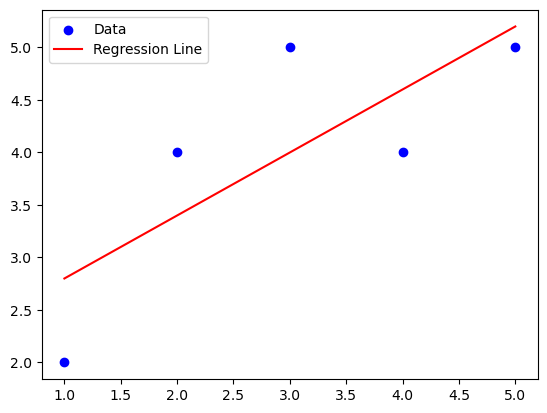

In [138]:
import matplotlib.pyplot as plt

data = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]})
model = smf.ols('y ~ X', data=data).fit()

plt.scatter(data['X'], data['y'], color='blue', label='Data')
plt.plot(data['X'], model.predict(), color='red', label='Regression Line')
plt.legend()
plt.show()
